In [1]:
import numpy  as np
import tensorflow as tf
import keras
from keras.layers import *
import glob
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
from matplotlib import image
import sys
import scipy
from skimage import transform

## Report Function

In [44]:
import pandas as pd
def plot_acc(path):
    model_log = pd.read_csv('./models/'+path+'/model.log')
    plt.figure(figsize=(5,5))
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    model_log['val_acc'].plot(label = 'Validation Accuracy')
    model_log['acc'].plot(label = 'Training Accuracy')
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
def plot_loss(path): 
    model_log = pd.read_csv('./models/'+path+'/model.log')
    plt.figure(figsize=(5,5))
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.ylabel('Loss')
    model_log['val_loss'].plot(label = 'Validation Loss')
    model_log['loss'].plot(label = 'Training Loss')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [4]:
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import math
def report_all(model,test,label):
    predict = model.predict(test)
    predict_int = []
    for i in predict:
        predict_int.append(i.round())
    predict_int = np.array(predict_int)
    print(classification_report(label, predict_int))
    print()
    confusion = confusion_matrix(label, predict_int)
    print(f"TP = {confusion[0][0]}, FN = {confusion[0][1]}\nFP = {confusion[1][0]}, TN = {confusion[1][1]}")
    plt.imshow(confusion)

In [20]:
import itertools
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
#     plt.figure(figsize=[9,9])
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['Normal','Diseases'])
    plt.yticks(tick_marks,['Normal','Diseases'])
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    thresh = cm.max() / 2 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),fontsize=10, horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fper, tper, label,predict):  
    score = roc_auc_score(label,predict)
    text = "ROC curve (area = " + "{:0.2f}".format(score) + ")"
    plt.plot(fper, tper, color='orange', label=text)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.tight_layout()
    plt.legend()
    plt.show()

In [22]:
from sklearn.metrics import precision_score , recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
def report_all(model,test,label):
    predict = model.predict(test)
    predict_int = []
    for i in predict:
        predict_int.append(i.round())
    predict_int = np.array(predict_int)
    print(classification_report(label, predict_int))
    print()
    confusion = confusion_matrix(label, predict_int)
    print(f"TP = {confusion[0][0]}, FN = {confusion[0][1]}\nFP = {confusion[1][0]}, TN = {confusion[1][1]}")
    
    fper, tper, thresholds = roc_curve(label,predict_int)
    plot_roc_curve(fper, tper, label,predict_int)
    plot_confusion_matrix(cm = confusion)

## Model

In [5]:
def model_classification():
    input_layer = Input(shape=(512, 512, 1))
    
    x = Conv2D(8, (3, 3), activation='relu', padding = 'same')(input_layer)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(16, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(256, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(512, (3, 3), activation='relu', padding = 'same')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    
    x = BatchNormalization()(x)
    x = Flatten()(x)

    x = Dense(512, activation='relu')(x)
    x = Dropout(0.5)(x)

    output_layer = Dense(1, activation='sigmoid')(x)
    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [3]:
normal1bmp_path = glob.glob('./training-set/Normal/*.bmp')
normal1jpg_path = glob.glob('./training-set/Normal/*.jpg')
normal2bmp_path = glob.glob('./test-set/Normal/*.bmp')
normal2jpg_path = glob.glob('./test-set/Normal/*.jpg')
normal3bmp_path = glob.glob('./validation-set/Normal/*.bmp')
normal3jpg_path = glob.glob('./validation-set/Normal/*.jpg')
diseases1_path = glob.glob('./training-set/Diseases/*.jpg')
diseases2_path = glob.glob('./test-set/Diseases/*.jpg')
diseases3_path = glob.glob('./validation-set/Diseases/*.jpg')

In [4]:
len(normal1bmp_path), len(normal1jpg_path), len(normal2bmp_path), len(normal2jpg_path), len(normal3bmp_path), len(normal3jpg_path)

(788, 3, 98, 1, 97, 2)

In [5]:
len(diseases1_path), len(diseases2_path), len(diseases3_path)

(791, 99, 99)

In [11]:
training_path = normal1bmp_path + normal1jpg_path + diseases1_path
test_path = normal2bmp_path + normal2jpg_path + diseases2_path
validation_path = normal3bmp_path + normal3jpg_path + diseases3_path
len(training_path), len(test_path), len(validation_path)

(1582, 198, 198)

In [12]:
training_path, test_path, validation_path

(['./training-set/Normal\\Thidar  หญิง  23_1.bmp',
  './training-set/Normal\\Thidar  หญิง  23_2.bmp',
  './training-set/Normal\\Thidar  หญิง  23_3.bmp',
  './training-set/Normal\\Thidar  หญิง  23_4.bmp',
  './training-set/Normal\\Thidar  หญิง  23_5.bmp',
  './training-set/Normal\\กนกอร  หญิง54_4.bmp',
  './training-set/Normal\\กนกอร  หญิง54_6.bmp',
  './training-set/Normal\\กมลทิพย์ หญิง 48_1.bmp',
  './training-set/Normal\\กมลทิพย์ หญิง 48_2.bmp',
  './training-set/Normal\\กมลทิพย์ หญิง 48_4.bmp',
  './training-set/Normal\\กรรษก ชาย 58_1.bmp',
  './training-set/Normal\\กรรษก ชาย 58_2.bmp',
  './training-set/Normal\\กรรษก ชาย 58_4.bmp',
  './training-set/Normal\\กรรษก ชาย 58_5.bmp',
  './training-set/Normal\\กฤตินี หญิง 32_1.bmp',
  './training-set/Normal\\กัญช์ภูมิ ชาย 24_1.bmp',
  './training-set/Normal\\กัญช์ภูมิ ชาย 24_2.bmp',
  './training-set/Normal\\กันตพัฒน์ ชาย 21_2.bmp',
  './training-set/Normal\\กันตพัฒน์ ชาย 21_3.bmp',
  './training-set/Normal\\กันตพัฒน์ ชาย 21_4.bmp',
  '.

In [13]:
# training_images = np.load('training_images.npy', allow_pickle=True)
training_images = [image.imread(path) for path in training_path]
training_images = np.array(training_images)
# np.save('training_images', training_images)

In [14]:
# test_images = np.load('test_images.npy', allow_pickle=True)
test_images = [image.imread(path) for path in test_path]
test_images = np.array(test_images)
# np.save('test_images',test_images)

In [15]:
# validation_images = np.load('validation_images.npy', allow_pickle=True)
validation_images = [image.imread(path) for path in validation_path]
validation_images = np.array(validation_images)
# np.save('validation_images',validation_images)

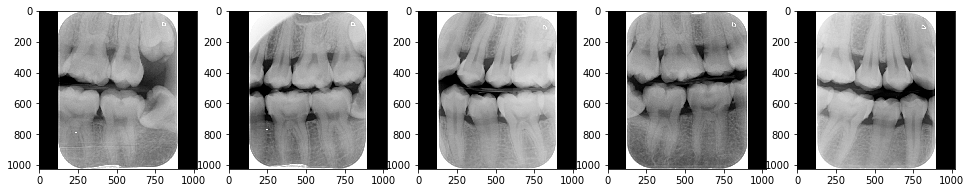

In [16]:
plt.figure(figsize=(30, 30))
for i in range(5):
    image = training_images[i][:,:,:]
    plt.subplot(199-i)
    plt.imshow(image)

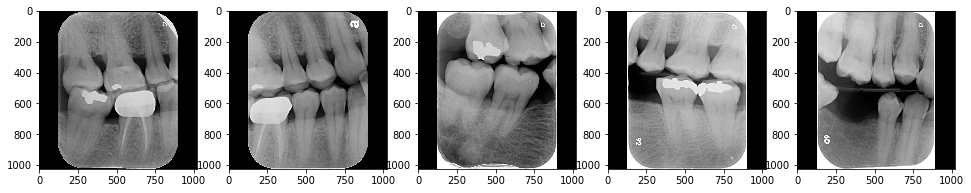

In [17]:
plt.figure(figsize=(30, 30))
for i in range(5):
    image = test_images[i][:,:,:]
    plt.subplot(199-i)
    plt.imshow(image)

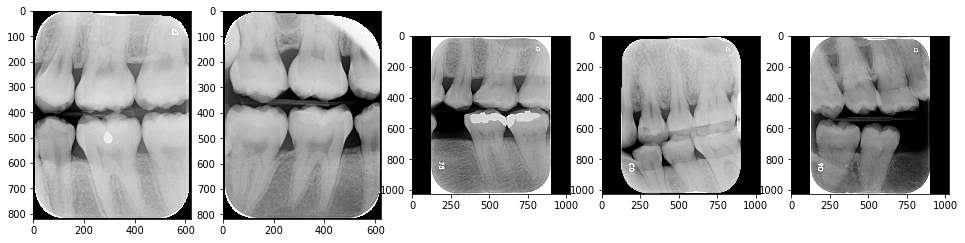

In [18]:
plt.figure(figsize=(30, 30))
for i in range(5):
    image = validation_images[i][:,:,:]
    plt.subplot(199-i)
    plt.imshow(image)

In [19]:
training_images.shape, test_images.shape, validation_images.shape

((1582,), (198,), (198,))

# Convert grayscale and Resize

In [20]:
def image_to_grayscale_and_resize(image):
    image = tf.image.rgb_to_grayscale(image)
    resized_images = tf.image.resize(image, (512, 512))
    resized_images = resized_images.numpy()
    return resized_images

In [21]:
for i in range(len(training_images)):
    training_images[i] = image_to_grayscale_and_resize(training_images[i])

In [22]:
for i in range(len(test_images)):
    test_images[i] = image_to_grayscale_and_resize(test_images[i])

In [23]:
for i in range(len(validation_images)):
    validation_images[i] = image_to_grayscale_and_resize(validation_images[i])

In [24]:
training_images = training_images.tolist()
test_images = test_images.tolist()
validation_images = validation_images.tolist()
training_images = np.array(training_images)
test_images = np.array(test_images)
validation_images = np.array(validation_images)

In [25]:
training_images.shape, test_images.shape, validation_images.shape

((1582, 512, 512, 1), (198, 512, 512, 1), (198, 512, 512, 1))

## Image Augmentation

In [26]:
def augment(images, mode):
    augmented_images = []

    for i in range(len(images)) :
        augmented = None
        afine_tf = transform.AffineTransform(shear=0.2)

        if mode == "zoom":
            h, w = images[i].shape[:2]
            
            zh = int(np.round(h / 1.2))
            zw = int(np.round(w / 1.2))
            top = (h - zh) // 2
            left = (w - zw) // 2
        
            augmented = scipy.ndimage.zoom(images[i][top:top+zh, left:left+zw], 1.2, order=0)
        elif mode == "rotate":
            augmented = scipy.ndimage.rotate(images[i], 45, reshape=False)
        elif mode == "shear":
            afine_tf = transform.AffineTransform(shear=0.2)
            augmented = transform.warp(images[i], inverse_map=afine_tf)

        augmented_images.append(augmented)
    
    augmented_images = np.array(augmented_images)
    print(augmented_images)
    print(augmented_images.shape)
    return augmented_images

## Train Augmentation

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

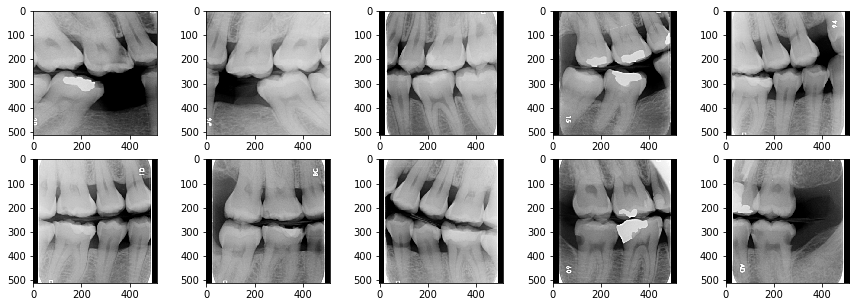

In [27]:
augmented_training_zoom = augment(training_images, "zoom")

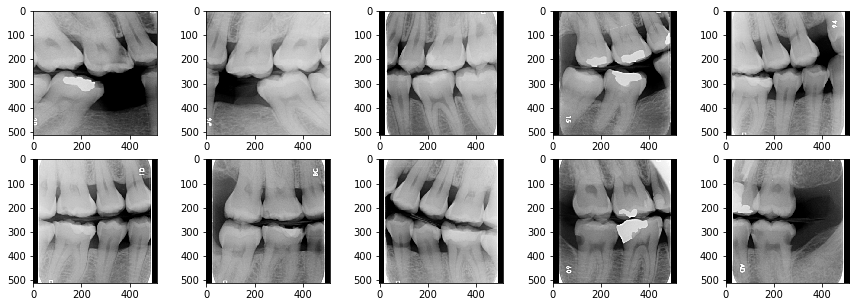

In [30]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_training_zoom[i+400][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

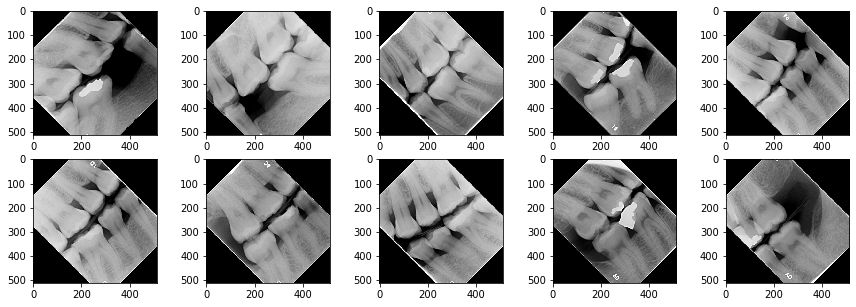

In [28]:
augmented_training_rotate = augment(training_images, "rotate")

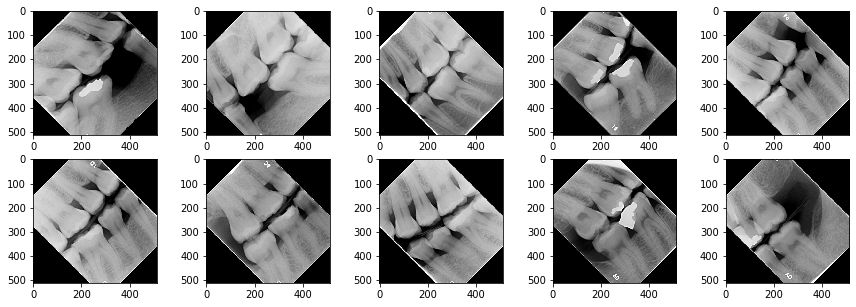

In [59]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_training_rotate[i+400][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

In [32]:
augmented_training_shear = augment(training_images, "shear")

[[[[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  ...

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [254.56258453]
   [254.98207362]
   [255.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [255.        ]
   [255.        ]
   [255.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [255.        ]
   [255.        ]
   [255.        ]]]


 [[[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
 

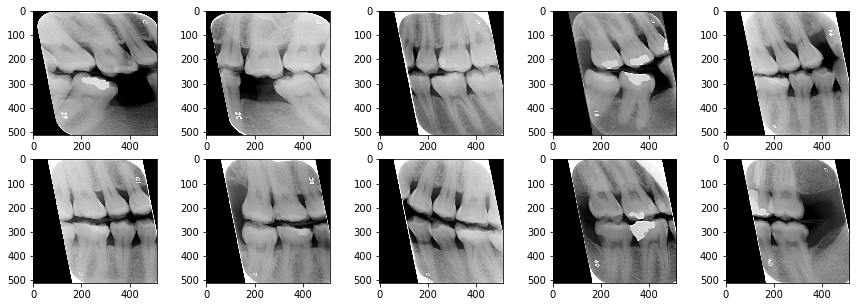

In [33]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_training_shear[i+400][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

## Test Augmentation

In [35]:
augmented_test_zoom = augment(test_images, "zoom")

[[[[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  [[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  [[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  ...

  [[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  [[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  [[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]]


 [[[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  [[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  [[  0.      ]
   [  0.      ]
   [  0.      ]
   ...
   [  0.      ]
   [  0.      ]
   [  0.      ]]

  ...

  [[  0.      ]
   [  0.      ]
   [  0

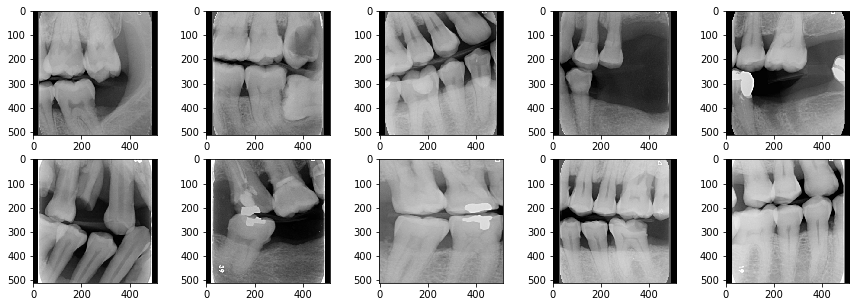

In [42]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_test_zoom[i+180][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

In [43]:
augmented_test_rotate = augment(test_images, "rotate")

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

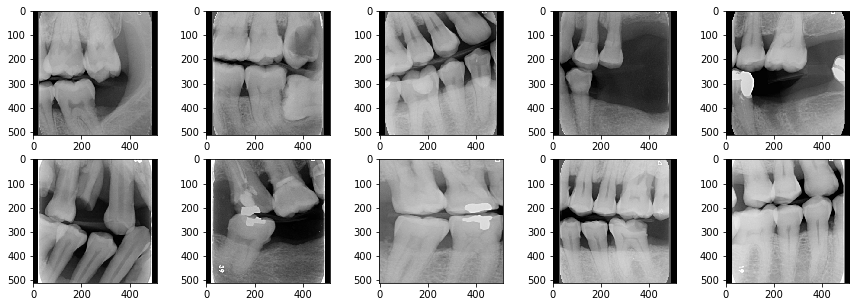

In [44]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_test_zoom[i+180][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

In [45]:
augmented_test_shear = augment(test_images, "shear")

[[[[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  ...

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [255.        ]
   [255.        ]
   [255.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [255.        ]
   [255.        ]
   [255.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [255.        ]
   [255.        ]
   [255.        ]]]


 [[[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   ...
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
 

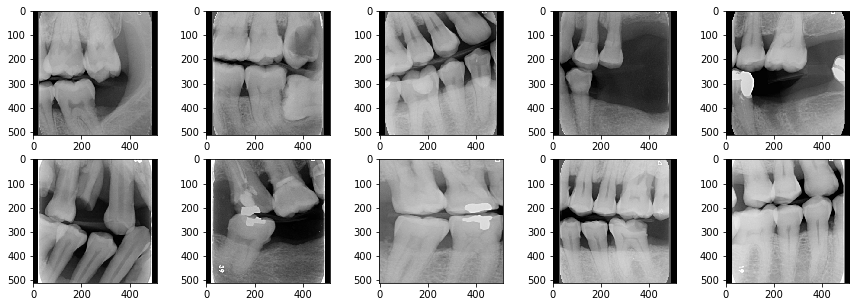

In [46]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_test_zoom[i+180][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

## Validate Augmentation

In [60]:
augmented_validation_zoom = augment(validation_images, "zoom")

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

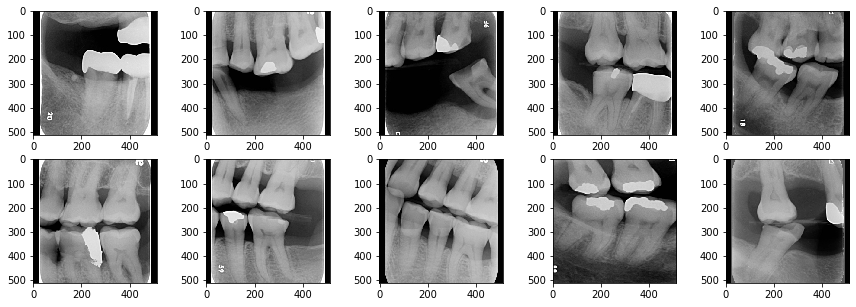

In [61]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_validation_zoom[i+180][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

In [62]:
augmented_validation_rotate = augment(validation_images, "rotate")

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

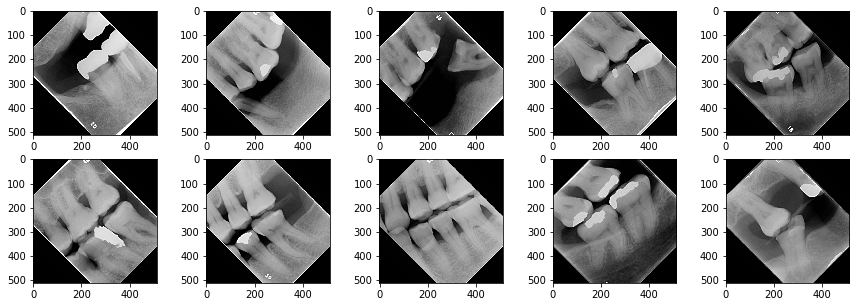

In [63]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_validation_rotate[i+180][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

In [64]:
augmented_validation_shear = augment(validation_images, "shear")

[[[[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  ...

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [2.42978936e+02]
   [2.51928966e+02]
   [2.54662530e+02]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [2.53577010e+02]
   [2.54919960e+02]
   [2.55000000e+02]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [2.55000000e+02]
   [2.55000000e+02]
   [2.55000000e+02]]]


 [[[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]
   [0.00000000e+00]
   ...
   [0.00000000e+00]
 

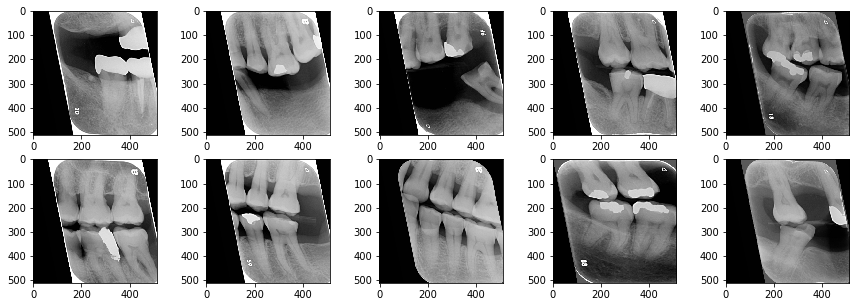

In [66]:
plt.figure(figsize=(15, 5))
for i in range(10):
    image = augmented_validation_shear[i+180][:,:,:]
    plt.subplot(2,5,1+i)
    plt.imshow(image.reshape(512,512), cmap='gray', vmin=0, vmax=255)

In [4]:
training_images = np.load("./training_images.npy")
augmented_training_zoom = np.load("./augmented_training_zoom.npy")
augmented_training_rotate = np.load("./augmented_training_rotate.npy")
augmented_training_shear = np.load("./augmented_training_shear.npy")

In [5]:
training_images.shape, augmented_training_zoom.shape, augmented_training_rotate.shape, augmented_training_shear.shape

((1582, 512, 512, 1),
 (1582, 512, 512, 1),
 (1582, 512, 512, 1),
 (1582, 512, 512, 1))

In [6]:
test_images = np.load("./test_images.npy")
augmented_test_zoom = np.load("./augmented_test_zoom.npy")
augmented_test_rotate = np.load("./augmented_test_rotate.npy")
augmented_test_shear = np.load("./augmented_test_shear.npy")

In [7]:
test_images.shape, augmented_test_zoom.shape, augmented_test_rotate.shape, augmented_test_shear.shape

((198, 512, 512, 1),
 (198, 512, 512, 1),
 (198, 512, 512, 1),
 (198, 512, 512, 1))

In [8]:
validation_images = np.load("./validation_images.npy")
augmented_validation_zoom = np.load("./augmented_validation_zoom.npy")
augmented_validation_rotate = np.load("./augmented_validation_rotate.npy")
augmented_validation_shear = np.load("./augmented_validation_shear.npy")

In [9]:
validation_images.shape, augmented_validation_zoom.shape, augmented_validation_rotate.shape, augmented_validation_shear.shape

((198, 512, 512, 1),
 (198, 512, 512, 1),
 (198, 512, 512, 1),
 (198, 512, 512, 1))

## A+B+C

### Load Test Data

In [9]:
test_and_augmented = np.load('./test_images.npy')
tmp_te_n = np.full(len(normal2bmp_path)+len(normal2jpg_path), 0)
tmp_te_d = np.full(len(diseases2_path), 1)
label_test = np.concatenate((tmp_te_n,tmp_te_d))
test_and_augmented.shape, label_test.shape

((198, 512, 512, 1), (198,))

In [61]:
training_and_augmented = np.load('./A-B-C/training-A-B-C.npy')
validation_and_augmented = np.load('./A-B-C/validation-A-B-C.npy')

In [40]:
# test_and_augmented = np.load('./A-B-C/test-A-B-C.npy')

In [ ]:
# training_and_augmented = np.concatenate((training_images, augmented_training_zoom, augmented_training_rotate, augmented_training_shear))
# test_and_augmented = np.concatenate((test_images, augmented_test_zoom, augmented_test_rotate, augmented_test_shear))
# validation_and_augmented = np.concatenate((validation_images, augmented_validation_zoom, augmented_validation_rotate, augmented_validation_shear))

In [62]:
training_and_augmented.shape, test_and_augmented.shape,validation_and_augmented.shape

((6328, 512, 512, 1), (198, 512, 512, 1), (792, 512, 512, 1))

In [18]:
# np.save('training_and_augmented',training_and_augmented)

In [11]:
# np.save("training_images",training_images)
# np.save("augmented_training_zoom",augmented_training_zoom)
# np.save("augmented_training_rotate",augmented_training_rotate)
# np.save("augmented_training_shear",augmented_training_shear)

In [13]:
# np.save("test_images",test_images)
# np.save("augmented_test_zoom",augmented_test_zoom)
# np.save("augmented_test_rotate",augmented_test_rotate)
# np.save("augmented_test_shear",augmented_test_shear)

In [19]:
# np.save('validation_and_augmented',validation_and_augmented)

In [94]:
# np.save("validation_images",validation_images)
# np.save("augmented_validation_zoom",augmented_validation_zoom)
# np.save("augmented_validation_rotate",augmented_validation_rotate)
# np.save("augmented_validation_shear",augmented_validation_shear)

## Define Label (A+B+C)

In [63]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)

label_training = np.concatenate((tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d))

In [64]:
label_training.shape, label_test.shape, label_validation.shape

((6328,), (198,), (792,))

In [65]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((6328, 512, 512, 1), (198, 512, 512, 1), (792, 512, 512, 1))

In [20]:
# np.save('./A-B-C/label_training-A-B-C',label_training)
# np.save('./A-B-C/label_test-A-B-C',label_test)
# np.save('./A-B-C/label_validation-A-B-C',label_validation)

In [12]:
model = model_classification()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0   

In [13]:
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

## Callback

In [14]:
model_name = 'Classification-A-B-C'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

## Train A+B+C

In [15]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 6328 samples, validate on 792 samples
Epoch 1/10
 - 63s - loss: 0.8405 - acc: 0.5841 - val_loss: 1.3006 - val_acc: 0.5088
Epoch 2/10
 - 32s - loss: 0.6221 - acc: 0.6455 - val_loss: 4.4422 - val_acc: 0.5000
Epoch 3/10
 - 27s - loss: 0.1950 - acc: 0.9186 - val_loss: 0.7348 - val_acc: 0.7740
Epoch 4/10
 - 27s - loss: 0.1062 - acc: 0.9567 - val_loss: 0.1410 - val_acc: 0.9520
Epoch 5/10
 - 33s - loss: 0.0978 - acc: 0.9591 - val_loss: 0.2221 - val_acc: 0.9104
Epoch 6/10
 - 24s - loss: 0.0903 - acc: 0.9640 - val_loss: 0.2148 - val_acc: 0.9394

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 7/10
 - 24s - loss: 0.0781 - acc: 0.9668 - val_loss: 0.1931 - val_acc: 0.9444
Epoch 8/10
 - 30s - loss: 0.0638 - acc: 0.9741 - val_loss: 0.1106 - val_acc: 0.9710
Epoch 9/10
 - 27s - loss: 0.0637 - acc: 0.9728 - val_loss: 0.4144 - val_acc: 0.9003
Epoch 10/10
 - 28s - loss: 0.0586 - acc: 0.9784 - val_loss: 0.1189 - val_acc: 0.9773

Epoch 00010: ReduceLROnPlateau

## Result A-B-C

In [14]:
model.load_weights('./models/Classification-A-B-C/weights-0.1189.hdf5')

In [15]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 10s 52ms/step


[0.09688338306215075, 0.9747474789619446]

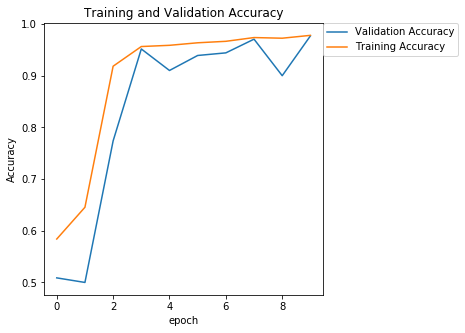

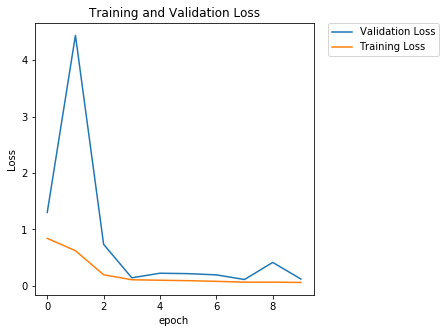

In [45]:
plot_acc('Classification-A-B-C')
plot_loss('Classification-A-B-C')

#### Precision, Recall, F1-score, Confusion Matrix

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        99
           1       0.96      0.99      0.98        99

    accuracy                           0.97       198
   macro avg       0.98      0.97      0.97       198
weighted avg       0.98      0.97      0.97       198


TP = 95, FN = 4
FP = 1, TN = 98


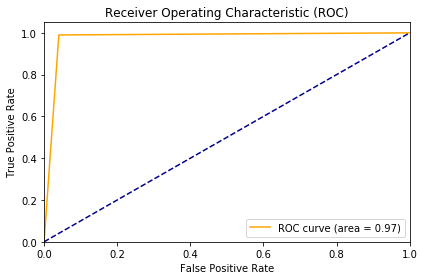

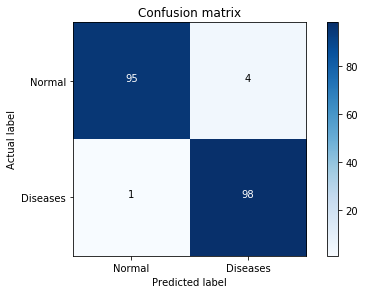

In [25]:
report_all(model,test_and_augmented,label_test)

## A+B

In [6]:
training_images = np.load("./training_images.npy")
augmented_training_zoom = np.load("./augmented_training_zoom.npy")
augmented_training_rotate = np.load("./augmented_training_rotate.npy")
#augmented_training_shear = np.load("./augmented_training_shear.npy")
validation_images = np.load("./validation_images.npy")
augmented_validation_zoom = np.load("./augmented_validation_zoom.npy")
augmented_validation_rotate = np.load("./augmented_validation_rotate.npy")
#augmented_validation_shear = np.load("./augmented_validation_shear.npy")

In [7]:
training_and_augmented = np.concatenate((training_images, augmented_training_zoom, augmented_training_rotate))
validation_and_augmented = np.concatenate((validation_images, augmented_validation_zoom, augmented_validation_rotate))

In [10]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((4746, 512, 512, 1), (198, 512, 512, 1), (594, 512, 512, 1))

## Define Label (A+B)

In [11]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)
label_training = np.concatenate((tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d))

In [12]:
label_training.shape, label_test.shape, label_validation.shape

((4746,), (198,), (594,))

## Training A+B

In [11]:
model = model_classification()
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0   

In [12]:
model_name = 'Classification-A-B'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

In [14]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 4746 samples, validate on 594 samples
Epoch 1/10
 - 23s - loss: 1.0014 - acc: 0.5818 - val_loss: 4.1349 - val_acc: 0.5034
Epoch 2/10
 - 10s - loss: 0.6435 - acc: 0.6176 - val_loss: 1.0764 - val_acc: 0.5152
Epoch 3/10
 - 10s - loss: 0.6147 - acc: 0.6559 - val_loss: 0.7236 - val_acc: 0.6279
Epoch 4/10
 - 10s - loss: 0.5985 - acc: 0.6903 - val_loss: 1.6062 - val_acc: 0.5051
Epoch 5/10
 - 10s - loss: 0.3670 - acc: 0.8266 - val_loss: 1.8429 - val_acc: 0.5589

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 6/10
 - 10s - loss: 0.1054 - acc: 0.9583 - val_loss: 0.3065 - val_acc: 0.9108
Epoch 7/10
 - 10s - loss: 0.0887 - acc: 0.9654 - val_loss: 0.2786 - val_acc: 0.9226
Epoch 8/10
 - 10s - loss: 0.0875 - acc: 0.9633 - val_loss: 0.2737 - val_acc: 0.9242
Epoch 9/10
 - 10s - loss: 0.0850 - acc: 0.9648 - val_loss: 0.6576 - val_acc: 0.8704

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.00011111111962236464.
Epoch 10/10
 - 10s - loss: 0.0796 

## Result A+B

In [30]:
model.load_weights('./models/Classification-A-B/weights-0.1808.hdf5')

In [31]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 0s 1ms/step


[0.14806762988669703, 0.939393937587738]

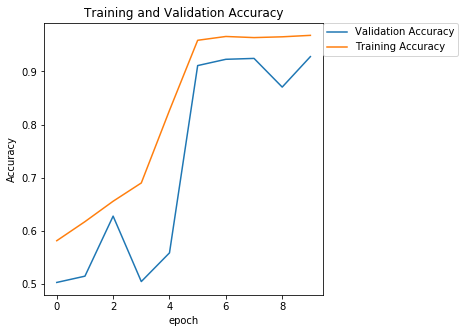

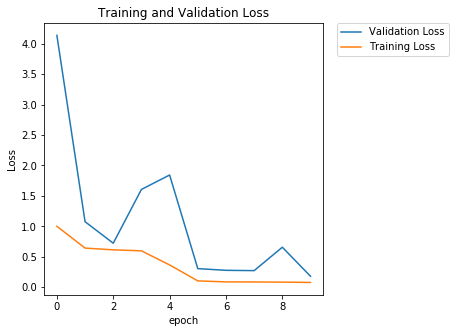

In [46]:
plot_acc('Classification-A-B')
plot_loss('Classification-A-B')

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        99
           1       0.98      0.90      0.94        99

    accuracy                           0.94       198
   macro avg       0.94      0.94      0.94       198
weighted avg       0.94      0.94      0.94       198


TP = 97, FN = 2
FP = 10, TN = 89


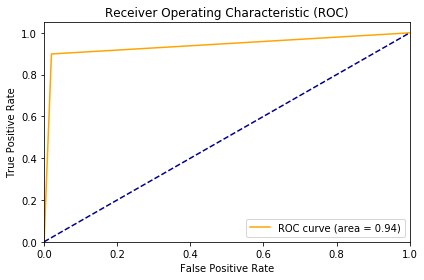

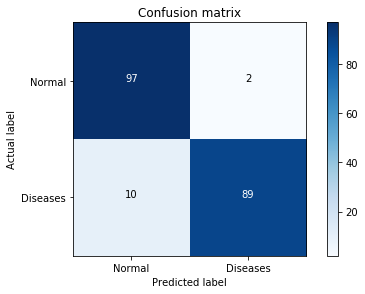

In [33]:
report_all(model,test_and_augmented,label_test)

# A+C

In [13]:
training_images = np.load("./training_images.npy")
augmented_training_zoom = np.load("./augmented_training_zoom.npy")
# augmented_training_rotate = np.load("./augmented_training_rotate.npy")
augmented_training_shear = np.load("./augmented_training_shear.npy")

validation_images = np.load("./validation_images.npy")
augmented_validation_zoom = np.load("./augmented_validation_zoom.npy")
# augmented_validation_rotate = np.load("./augmented_validation_rotate.npy")
augmented_validation_shear = np.load("./augmented_validation_shear.npy")

In [14]:
training_and_augmented = np.concatenate((training_images, augmented_training_zoom, augmented_training_shear))
validation_and_augmented = np.concatenate((validation_images, augmented_validation_zoom, augmented_validation_shear))

In [15]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((4746, 512, 512, 1), (198, 512, 512, 1), (594, 512, 512, 1))

## Define Label (A+C)

In [16]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)

label_training = np.concatenate((tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d))

In [17]:
label_training.shape, label_test.shape, label_validation.shape

((4746,), (198,), (594,))

## Training A+C

In [15]:
model = model_classification()
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0   

In [16]:
model_name = 'Classification-A-C'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

In [17]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 4746 samples, validate on 594 samples
Epoch 1/10
 - 45s - loss: 0.9435 - acc: 0.5891 - val_loss: 2.0501 - val_acc: 0.5152
Epoch 2/10
 - 14s - loss: 0.6223 - acc: 0.6483 - val_loss: 0.5687 - val_acc: 0.7088
Epoch 3/10
 - 13s - loss: 0.5747 - acc: 0.7008 - val_loss: 5.1447 - val_acc: 0.5000
Epoch 4/10
 - 13s - loss: 0.2442 - acc: 0.8951 - val_loss: 3.7024 - val_acc: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 5/10
 - 13s - loss: 0.1021 - acc: 0.9600 - val_loss: 1.0331 - val_acc: 0.7525
Epoch 6/10
 - 13s - loss: 0.0895 - acc: 0.9652 - val_loss: 0.1784 - val_acc: 0.9529
Epoch 7/10
 - 13s - loss: 0.0807 - acc: 0.9659 - val_loss: 0.1659 - val_acc: 0.9310
Epoch 8/10
 - 13s - loss: 0.0745 - acc: 0.9688 - val_loss: 0.2060 - val_acc: 0.9545
Epoch 9/10
 - 13s - loss: 0.0686 - acc: 0.9745 - val_loss: 0.1522 - val_acc: 0.9478
Epoch 10/10
 - 13s - loss: 0.0693 - acc: 0.9741 - val_loss: 0.1328 - val_acc: 0.9680


## Result A+C

In [34]:
model.load_weights('./models/Classification-A-C/weights-0.1328.hdf5')

In [35]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 0s 1ms/step


[0.11121033690869808, 0.9444444179534912]

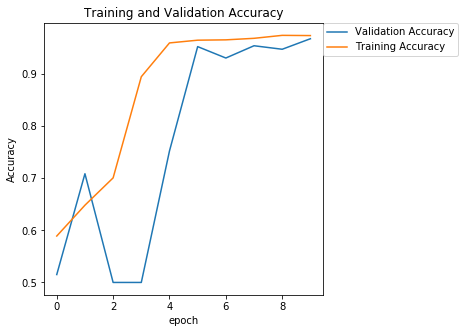

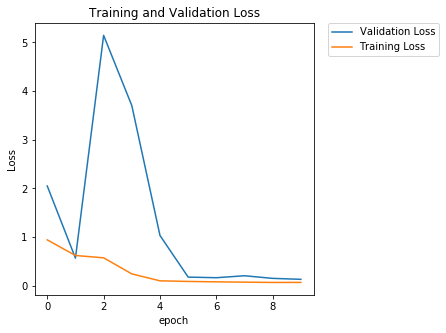

In [47]:
plot_acc('Classification-A-C')
plot_loss('Classification-A-C')

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        99
           1       0.96      0.93      0.94        99

    accuracy                           0.94       198
   macro avg       0.94      0.94      0.94       198
weighted avg       0.94      0.94      0.94       198


TP = 95, FN = 4
FP = 7, TN = 92


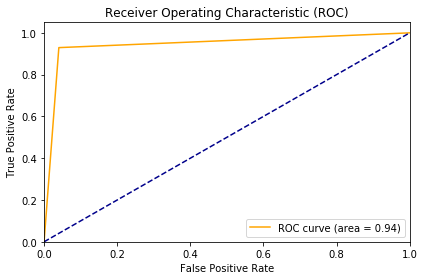

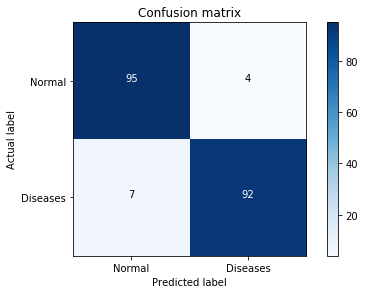

In [37]:
report_all(model,test_and_augmented,label_test)

# B+C

In [18]:
training_images = np.load("./training_images.npy")
# augmented_training_zoom = np.load("./augmented_training_zoom.npy")
augmented_training_rotate = np.load("./augmented_training_rotate.npy")
augmented_training_shear = np.load("./augmented_training_shear.npy")

validation_images = np.load("./validation_images.npy")
# augmented_validation_zoom = np.load("./augmented_validation_zoom.npy")
augmented_validation_rotate = np.load("./augmented_validation_rotate.npy")
augmented_validation_shear = np.load("./augmented_validation_shear.npy")

In [19]:
training_and_augmented = np.concatenate((training_images, augmented_training_rotate, augmented_training_shear))
validation_and_augmented = np.concatenate((validation_images, augmented_validation_rotate, augmented_validation_shear))

In [20]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((4746, 512, 512, 1), (198, 512, 512, 1), (594, 512, 512, 1))

## Define Label (B+C)

In [21]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)

label_training = np.concatenate((tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d))

In [22]:
label_training.shape, label_test.shape, label_validation.shape

((4746,), (198,), (594,))

## Training B+C

In [14]:
model = model_classification()
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0   

In [15]:
model_name = 'Classification-B-C'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

In [16]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 4746 samples, validate on 594 samples
Epoch 1/10
 - 42s - loss: 0.8663 - acc: 0.5858 - val_loss: 3.5599 - val_acc: 0.5034
Epoch 2/10
 - 14s - loss: 0.6396 - acc: 0.6302 - val_loss: 0.8397 - val_acc: 0.5488
Epoch 3/10
 - 13s - loss: 0.6174 - acc: 0.6572 - val_loss: 6.6426 - val_acc: 0.5000
Epoch 4/10
 - 13s - loss: 0.2137 - acc: 0.9020 - val_loss: 7.9603 - val_acc: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 5/10
 - 13s - loss: 0.1075 - acc: 0.9505 - val_loss: 0.8882 - val_acc: 0.6785
Epoch 6/10
 - 13s - loss: 0.1036 - acc: 0.9545 - val_loss: 0.2630 - val_acc: 0.9141
Epoch 7/10
 - 13s - loss: 0.1026 - acc: 0.9560 - val_loss: 0.2189 - val_acc: 0.9411
Epoch 8/10
 - 13s - loss: 0.1001 - acc: 0.9545 - val_loss: 0.1468 - val_acc: 0.9343
Epoch 9/10
 - 13s - loss: 0.0959 - acc: 0.9587 - val_loss: 0.1434 - val_acc: 0.9411
Epoch 10/10
 - 13s - loss: 0.0897 - acc: 0.9612 - val_loss: 0.1648 - val_acc: 0.9411

Epoch 00010: ReduceLROnPlateau

## Result B+C

In [40]:
model.load_weights('./models/Classification-B-C/weights-0.1434.hdf5')

In [41]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 0s 1ms/step


[0.139355076081825, 0.9292929172515869]

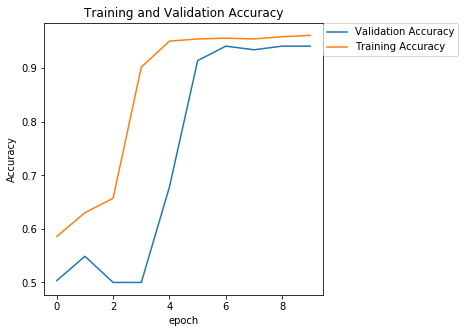

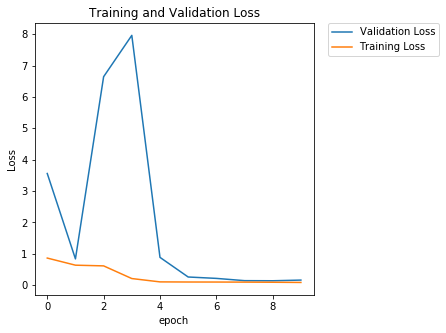

In [48]:
plot_acc('Classification-B-C')
plot_loss('Classification-B-C')

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        99
           1       0.96      0.90      0.93        99

    accuracy                           0.93       198
   macro avg       0.93      0.93      0.93       198
weighted avg       0.93      0.93      0.93       198


TP = 95, FN = 4
FP = 10, TN = 89


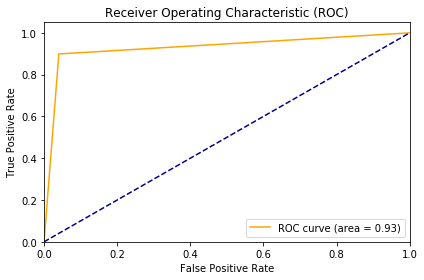

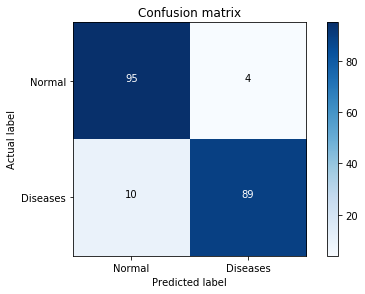

In [43]:
report_all(model,test_and_augmented,label_test)

# A

In [23]:
training_images = np.load("./training_images.npy")
augmented_training_zoom = np.load("./augmented_training_zoom.npy")

validation_images = np.load("./validation_images.npy")
augmented_validation_zoom = np.load("./augmented_validation_zoom.npy")

In [24]:
training_and_augmented = np.concatenate((training_images, augmented_training_zoom))
validation_and_augmented = np.concatenate((validation_images, augmented_validation_zoom))

In [25]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((3164, 512, 512, 1), (198, 512, 512, 1), (396, 512, 512, 1))

## Define Label (A)

In [26]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)

label_training = np.concatenate((tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d))

In [27]:
label_training.shape, label_test.shape, label_validation.shape

((3164,), (198,), (396,))

## Training A

In [14]:
model = model_classification()
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0   

In [15]:
model_name = 'Classification-A'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

In [16]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 3164 samples, validate on 396 samples
Epoch 1/10
 - 16s - loss: 1.2083 - acc: 0.5724 - val_loss: 10.9858 - val_acc: 0.5000
Epoch 2/10
 - 7s - loss: 0.6525 - acc: 0.6078 - val_loss: 0.5700 - val_acc: 0.6869
Epoch 3/10
 - 7s - loss: 0.6189 - acc: 0.6435 - val_loss: 10.4212 - val_acc: 0.5000
Epoch 4/10
 - 7s - loss: 0.6052 - acc: 0.6723 - val_loss: 8.8345 - val_acc: 0.5000

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 5/10
 - 7s - loss: 0.3424 - acc: 0.8502 - val_loss: 13.3328 - val_acc: 0.5000
Epoch 6/10
 - 7s - loss: 0.0964 - acc: 0.9589 - val_loss: 4.1989 - val_acc: 0.6061

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.00011111111962236464.
Epoch 7/10
 - 7s - loss: 0.0844 - acc: 0.9668 - val_loss: 2.0513 - val_acc: 0.7096
Epoch 8/10
 - 7s - loss: 0.0818 - acc: 0.9637 - val_loss: 1.0573 - val_acc: 0.7652

Epoch 00008: ReduceLROnPlateau reducing learning rate to 3.703703987412155e-05.
Epoch 9/10
 - 6s - loss: 0.0769 - acc: 0.

## Result A

In [44]:
model.load_weights('./models/Classification-A/weights-0.2039.hdf5')

In [45]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 0s 1ms/step


[0.15597476567508597, 0.9494949579238892]

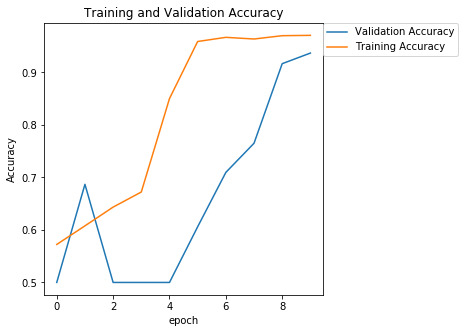

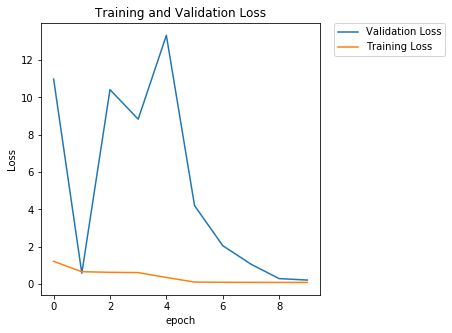

In [49]:
plot_acc('Classification-A')
plot_loss('Classification-A')

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        99
           1       0.91      1.00      0.95        99

    accuracy                           0.95       198
   macro avg       0.95      0.95      0.95       198
weighted avg       0.95      0.95      0.95       198


TP = 89, FN = 10
FP = 0, TN = 99


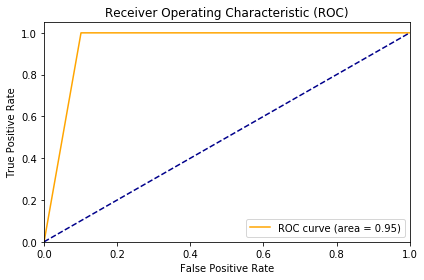

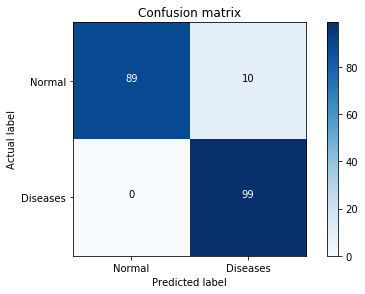

In [47]:
report_all(model,test_and_augmented,label_test)

# B

In [28]:
training_images = np.load("./training_images.npy")
augmented_training_rotate = np.load("./augmented_training_rotate.npy")

validation_images = np.load("./validation_images.npy")
augmented_validation_rotate = np.load("./augmented_validation_rotate.npy")

In [29]:
training_and_augmented = np.concatenate((training_images, augmented_training_rotate))
validation_and_augmented = np.concatenate((validation_images, augmented_validation_rotate))

In [30]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((3164, 512, 512, 1), (198, 512, 512, 1), (396, 512, 512, 1))

## Define Label (B)

In [31]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)

label_training = np.concatenate((tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d))

In [32]:
label_training.shape, label_test.shape, label_validation.shape

((3164,), (198,), (396,))

## Training B

In [14]:
model = model_classification()
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0   

In [15]:
model_name = 'Classification-B'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

In [16]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 3164 samples, validate on 396 samples
Epoch 1/10
 - 12s - loss: 0.9902 - acc: 0.5784 - val_loss: 8.7321 - val_acc: 0.5000
Epoch 2/10
 - 7s - loss: 0.6599 - acc: 0.5936 - val_loss: 1.8282 - val_acc: 0.5076
Epoch 3/10
 - 7s - loss: 0.6446 - acc: 0.6296 - val_loss: 0.8855 - val_acc: 0.5227
Epoch 4/10
 - 6s - loss: 0.6261 - acc: 0.6523 - val_loss: 3.0545 - val_acc: 0.5000
Epoch 5/10
 - 6s - loss: 0.1990 - acc: 0.9143 - val_loss: 5.9445 - val_acc: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 6/10
 - 7s - loss: 0.1141 - acc: 0.9479 - val_loss: 1.2348 - val_acc: 0.5960
Epoch 7/10
 - 6s - loss: 0.1034 - acc: 0.9564 - val_loss: 0.2956 - val_acc: 0.9116
Epoch 8/10
 - 6s - loss: 0.1011 - acc: 0.9586 - val_loss: 0.3762 - val_acc: 0.9040
Epoch 9/10
 - 6s - loss: 0.0970 - acc: 0.9589 - val_loss: 0.3292 - val_acc: 0.8990

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.00011111111962236464.
Epoch 10/10
 - 6s - loss: 0.0961 - acc: 0.

## Result B

In [49]:
model.load_weights('./models/Classification-B/weights-0.1757.hdf5')

In [50]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 0s 1ms/step


[0.13409994437236977, 0.9494949579238892]

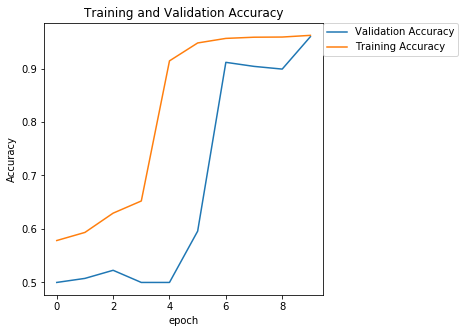

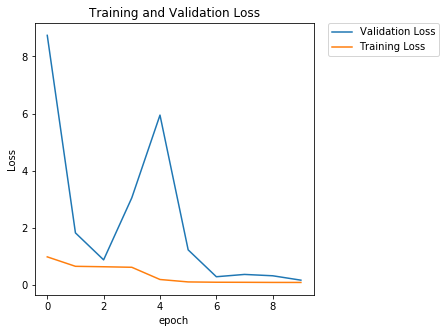

In [50]:
plot_acc('Classification-B')
plot_loss('Classification-B')

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        99
           1       0.94      0.96      0.95        99

    accuracy                           0.95       198
   macro avg       0.95      0.95      0.95       198
weighted avg       0.95      0.95      0.95       198


TP = 93, FN = 6
FP = 4, TN = 95


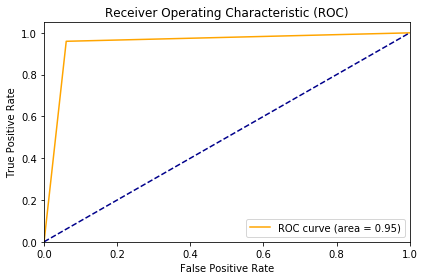

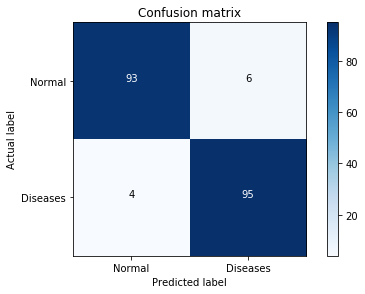

In [52]:
report_all(model,test_and_augmented,label_test)

## C

In [33]:
training_images = np.load("./training_images.npy")
augmented_training_shear = np.load("./augmented_training_shear.npy")

validation_images = np.load("./validation_images.npy")
augmented_validation_shear = np.load("./augmented_validation_shear.npy")

In [34]:
training_and_augmented = np.concatenate((training_images, augmented_training_shear))
validation_and_augmented = np.concatenate((validation_images, augmented_validation_shear))

In [35]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((3164, 512, 512, 1), (198, 512, 512, 1), (396, 512, 512, 1))

## Define Label (C)

In [36]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)

label_training = np.concatenate((tmp_tr_n,tmp_tr_d, tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d,tmp_val_n,tmp_val_d))

In [37]:
label_training.shape, label_test.shape, label_validation.shape

((3164,), (198,), (396,))

## Training C

In [26]:
model = model_classification()
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0   

In [27]:
model_name = 'Classification-C'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

In [28]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 3164 samples, validate on 396 samples
Epoch 1/10
 - 14s - loss: 0.9421 - acc: 0.5743 - val_loss: 18.8266 - val_acc: 0.5000
Epoch 2/10
 - 8s - loss: 0.6521 - acc: 0.6100 - val_loss: 1.3976 - val_acc: 0.5101
Epoch 3/10
 - 8s - loss: 0.6225 - acc: 0.6514 - val_loss: 3.3922 - val_acc: 0.5000
Epoch 4/10
 - 8s - loss: 0.5995 - acc: 0.6805 - val_loss: 0.7164 - val_acc: 0.6010
Epoch 5/10
 - 8s - loss: 0.3817 - acc: 0.8154 - val_loss: 6.9441 - val_acc: 0.5000
Epoch 6/10
 - 8s - loss: 0.1207 - acc: 0.9472 - val_loss: 6.6812 - val_acc: 0.5000

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 7/10
 - 8s - loss: 0.1011 - acc: 0.9564 - val_loss: 1.1652 - val_acc: 0.6414
Epoch 8/10
 - 8s - loss: 0.0931 - acc: 0.9605 - val_loss: 0.1722 - val_acc: 0.9470
Epoch 9/10
 - 8s - loss: 0.0901 - acc: 0.9621 - val_loss: 0.2746 - val_acc: 0.9242
Epoch 10/10
 - 8s - loss: 0.0897 - acc: 0.9611 - val_loss: 0.1525 - val_acc: 0.9293


## Result C

In [53]:
model.load_weights('./models/Classification-C/weights-0.1525.hdf5')

In [54]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 0s 1ms/step


[0.15170250607259345, 0.9343434572219849]

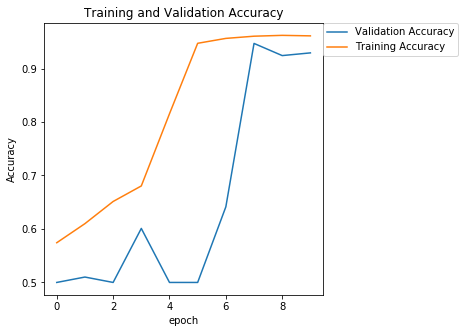

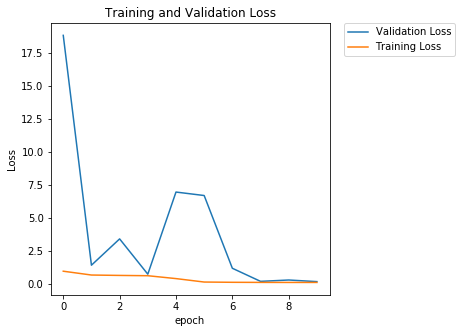

In [51]:
plot_acc('Classification-C')
plot_loss('Classification-C')

              precision    recall  f1-score   support

           0       0.89      0.99      0.94        99
           1       0.99      0.88      0.93        99

    accuracy                           0.93       198
   macro avg       0.94      0.93      0.93       198
weighted avg       0.94      0.93      0.93       198


TP = 98, FN = 1
FP = 12, TN = 87


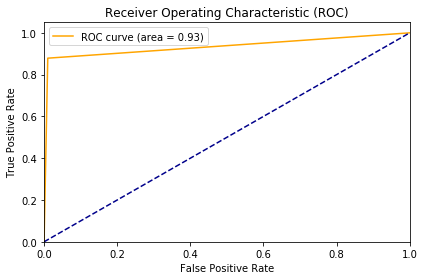

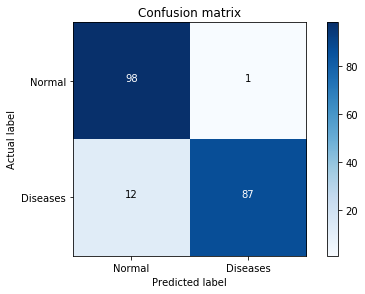

In [56]:
report_all(model,test_and_augmented,label_test)

## Non Augmentation

In [38]:
training_images = np.load("./training_images.npy")

validation_images = np.load("./validation_images.npy")

In [39]:
training_and_augmented = training_images
validation_and_augmented = validation_images

In [40]:
training_and_augmented.shape, test_and_augmented.shape, validation_and_augmented.shape

((1582, 512, 512, 1), (198, 512, 512, 1), (198, 512, 512, 1))

## Define Label 

In [41]:
tmp_tr_n = np.full(len(normal1bmp_path)+len(normal1jpg_path), 0)
tmp_tr_d = np.full(len(diseases1_path), 1)
tmp_val_n = np.full(len(normal3bmp_path)+len(normal3jpg_path), 0)
tmp_val_d = np.full(len(diseases3_path), 1)

label_training = np.concatenate((tmp_tr_n,tmp_tr_d))
label_validation = np.concatenate((tmp_val_n,tmp_val_d))

In [42]:
label_training.shape, label_test.shape, label_validation.shape

((1582,), (198,), (198,))

## Training

In [39]:
model = model_classification()
model.summary()
optimizer = keras.optimizers.Adam()
model.compile(optimizer, 'binary_crossentropy', ['acc'])

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 512, 512, 1)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 512, 512, 8)       80        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 256, 256, 8)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 256, 256, 16)      1168      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 64, 64, 32)        0   

In [40]:
model_name = 'Classification-Non-Augmentation'
model_path = f'./models/{model_name}/'

checkpoints_filenames = "weights-{val_loss:.4f}.hdf5"
checkpoints = keras.callbacks.ModelCheckpoint(model_path+checkpoints_filenames, monitor='val_loss', save_weights_only=True)
csv_logger = keras.callbacks.CSVLogger(model_path+'model.log', append=True)

rlr = keras.callbacks.ReduceLROnPlateau(factor=1/3, min_delta=0.01, patience=2, verbose=1, min_lr=1e-6)
er = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=5, verbose=1, restore_best_weights=True)

callback_list = [checkpoints,csv_logger,rlr]

In [41]:
history_dense512 = model.fit(training_and_augmented, label_training, epochs=10, 
                             validation_data=(validation_and_augmented, label_validation)
                              , batch_size=50, verbose=2, callbacks=callback_list)

Train on 1582 samples, validate on 198 samples
Epoch 1/10
 - 5s - loss: 1.4144 - acc: 0.5638 - val_loss: 26.7035 - val_acc: 0.5000
Epoch 2/10
 - 3s - loss: 0.6598 - acc: 0.6062 - val_loss: 7.4754 - val_acc: 0.5000
Epoch 3/10
 - 3s - loss: 0.6574 - acc: 0.6144 - val_loss: 4.0717 - val_acc: 0.5000
Epoch 4/10
 - 3s - loss: 0.6406 - acc: 0.6195 - val_loss: 1.9469 - val_acc: 0.5202
Epoch 5/10
 - 3s - loss: 0.6293 - acc: 0.6454 - val_loss: 0.7889 - val_acc: 0.5808
Epoch 6/10
 - 3s - loss: 0.6046 - acc: 0.6625 - val_loss: 0.5776 - val_acc: 0.7020
Epoch 7/10
 - 3s - loss: 0.4731 - acc: 0.7724 - val_loss: 20.9653 - val_acc: 0.5000
Epoch 8/10
 - 3s - loss: 0.1313 - acc: 0.9418 - val_loss: 1.2965 - val_acc: 0.8838

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.0003333333491658171.
Epoch 9/10
 - 3s - loss: 0.0979 - acc: 0.9602 - val_loss: 1.0685 - val_acc: 0.8889
Epoch 10/10
 - 3s - loss: 0.0914 - acc: 0.9614 - val_loss: 0.5372 - val_acc: 0.9040


## Result Non Augmentation

In [57]:
model.load_weights('./models/Classification-Non-Augmentation/weights-0.5372.hdf5')

In [58]:
model.evaluate(test_and_augmented,label_test)

198/198 [==============================] - 0s 989us/step


[0.4133084507475635, 0.9191918969154358]

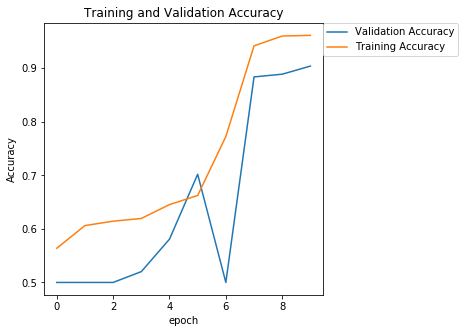

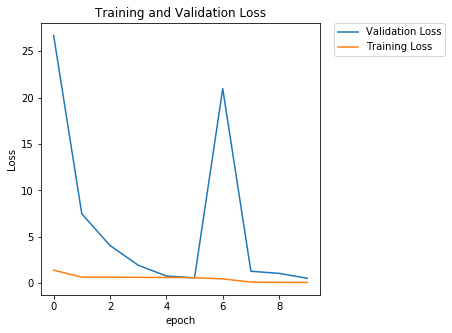

In [52]:
plot_acc('Classification-Non-Augmentation')
plot_loss('Classification-Non-Augmentation')

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        99
           1       0.86      1.00      0.93        99

    accuracy                           0.92       198
   macro avg       0.93      0.92      0.92       198
weighted avg       0.93      0.92      0.92       198


TP = 83, FN = 16
FP = 0, TN = 99


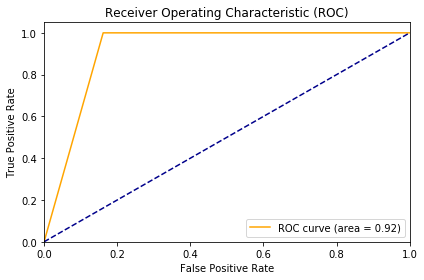

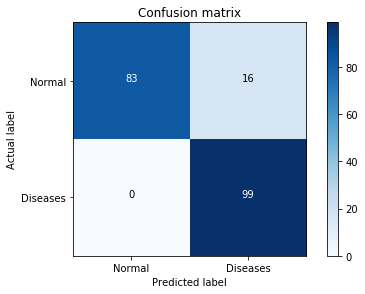

In [60]:
report_all(model,test_and_augmented,label_test)